In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['Time', 'ID', 'DLC', 'Data0', 'Data1', 'Data2', 'Data3', 'Data4',
       'Data5', 'Data6', 'Data7']
def read_data(filename, label):

   df = pd.read_csv(filename, header=None, names=columns, index_col=False)
   # if label != 'Normal':
   #    df.columns = columns + ['Label']
   # else:
   #    df.columns = columns
   df = df.sort_values(by=['Time'])
   # Time Gap in ms
   df['Time_Gap'] = df['Time'].diff(1) * 1000
   df['Label'] = label
   return df

In [3]:
files = [
    ('Normal', '../Data/Survival/KIA/Normal_dataset_KIA.txt'),
    ('DoS', '../Data/Survival/KIA/Flooding_dataset_KIA.txt'),
    ('Fuzzy', '../Data/Survival/KIA/Fuzzy_dataset_KIA.txt'),
    ('Malfuntion', '../Data/Survival/KIA/Malfunction_dataset_KIA.txt'),
]
df_dict = dict(map(lambda x: (x[0], read_data(x[1], x[0])), files))
print(len(df_dict))

<ipython-input-2-3811730cf99e>:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filename, header=None, names=columns, index_col=False)
<ipython-input-2-3811730cf99e>:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filename, header=None, names=columns, index_col=False)


4


<ipython-input-2-3811730cf99e>:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filename, header=None, names=columns, index_col=False)


In [4]:
df = pd.concat(df_dict.values())
df

,Time,ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Time_Gap,Label
0,1.513920e+09,110,8,D0,1C,10,09,00,00,00,00,NaN,Normal
1,1.513920e+09,4B1,8,79,53,E5,82,00,00,00,33,0.734091,Normal
2,1.513920e+09,164,8,00,08,00,00,00,00,03,0B,0.245094,Normal
3,1.513920e+09,260,8,05,22,00,30,FF,99,61,0D,0.232935,Normal
4,1.513920e+09,2A0,8,02,00,48,90,E8,0F,33,03,0.236034,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173431,1.513920e+09,0440,8,FF,00,00,00,FF,88,09,00,0.243902,Malfuntion
173432,1.513920e+09,0545,8,D8,0F,00,8D,06,00,06,00,0.236034,Malfuntion
173433,1.513920e+09,04B0,8,00,00,00,00,00,00,00,00,1.527071,Malfuntion
173434,1.513920e+09,0164,8,00,08,01,00,00,00,04,0D,0.258923,Malfuntion


In [14]:
def q1(x): return x.quantile(0.25)
def q4(x): return x.quantile(0.75)
df.groupby(['Label'])['Time_Gap'].agg(['min','max', 'mean', 'std'])

,min,max,mean,std
Label,,,,
DoS,0.100136,4.751921,0.391348,0.562429
Fuzzy,0.020027,4.652977,0.401579,0.437003
Malfuntion,0.109911,7.706165,0.461432,0.704772
Normal,0.125885,4.513979,0.478519,0.602313


In [7]:
print(*(f'{name} : {len(data["ID"].unique())}\n' for name, data in df_dict.items()))

Normal : 45
 DoS : 46
 Fuzzy : 2048
 Malfuntion : 45



In [31]:
df.groupby('Label')['Time'].count()

Label
DoS           181901
Fuzzy         249990
Malfuntion    173436
Normal        192516
Name: Time, dtype: int64

In [29]:
(df[df['Label'] == 'Normal']['Time'].max() - df[df['Label'] == 'Normal']['Time'].min()) / 60

1.1864369988441468

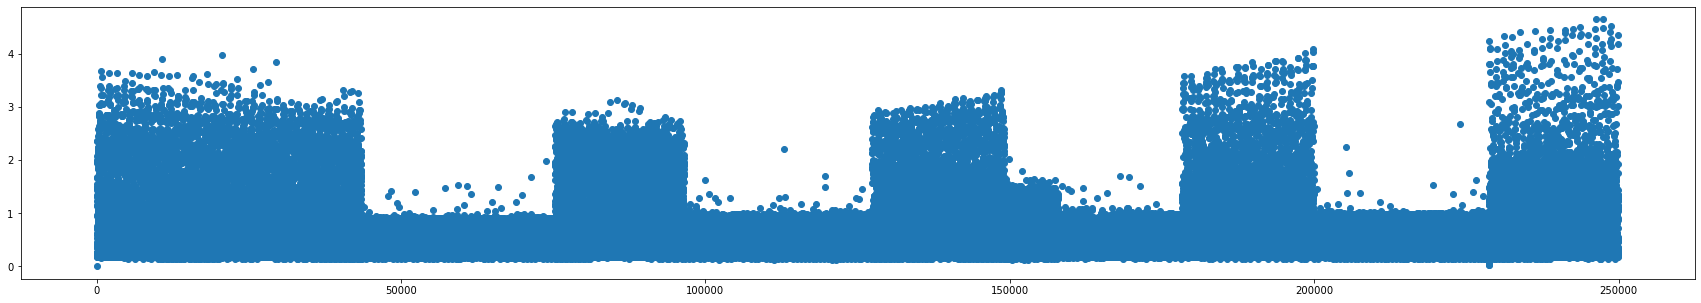

In [25]:
plt.figure(figsize=(30, 5))
data = df_dict['Fuzzy']['Time_Gap']
plt.scatter(range(len(data)), data)

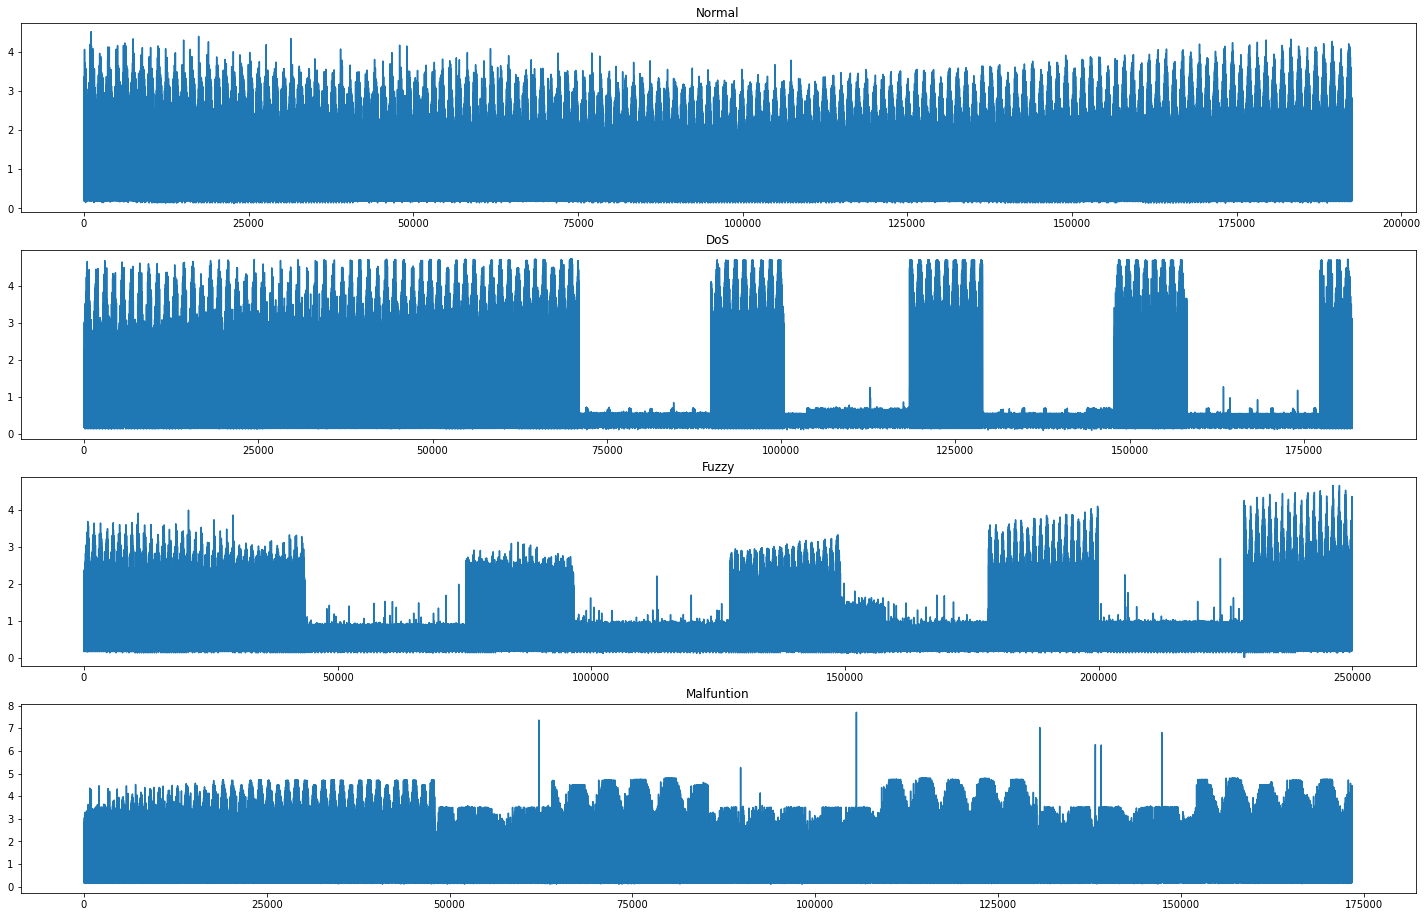

In [129]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(25, 16))
for i, (name, data) in enumerate(df_dict.items()):
    ax[i].plot(data['Time_Gap'][:])
    ax[i].set_title(name)

In [12]:
time_group = df.groupby(['Label'])['Time'].agg(['min','max'])
time_group['duration'] = time_group['max'] - time_group['min']
time_group

,min,max,duration
Label,,,
DoS,1.513922e+09,1.513922e+09,71.186220
Fuzzy,1.513920e+09,1.513920e+09,100.390446
Malfuntion,1.513920e+09,1.513920e+09,80.028504
Normal,1.513920e+09,1.513920e+09,92.122059


## Normal data

In [40]:
df = pd.read_csv('./Data/Survival/KIA/Normal_dataset_KIA.txt', header=None)
data = df.iloc[:, 3].str.split(expand=True)
df = pd.concat([df.iloc[:, 0:3], data], axis=1)
df.to_csv('./Data/Survival/KIA/Normal_dataset_KIA.txt', header=None, index=False)

In [10]:
with open('./Data/Car-Hacking/normal_run_data.txt') as f:
    lines = f.readlines()

def extract_data(line):
    line = line.split()
    pos_map = {
        'timestamp': 1,
        'ID': 3,
        'DLC': 6,
        # data: [7:]
    }
    timestamp = line[pos_map['timestamp']]
    canid = line[pos_map['ID']]
    dlc = line[pos_map['DLC']]
    data = line[7:]
    return [timestamp, canid, dlc] + [x for x in data]

# The last line of the file only contain timestamp, so we ignore it
raw_data = list(map(extract_data, lines[:-1]))

columns = ['Timestamp', 'ID', 'DLC']
columns = columns + ['Data' + str(x) for x in range(8)]
df = pd.DataFrame(raw_data, columns=columns)
df.head()

df = df.astype({"Timestamp": float, "DLC": int})

df.info()

df.to_csv('./Data/Car-Hacking/normal.csv', index=None)

In [42]:
columns = ['Timestamp', 'ID', 'DLC', 'Data0', 'Data1', 'Data2', 'Data3', 'Data4',
       'Data5', 'Data6', 'Data7']
# df = pd.read_csv('./Data/Car-Hacking/normal.csv')
df = pd.read_csv('./Data/Survival/KIA/Normal_dataset_KIA.txt', header=None)
df.columns = columns
df

,Timestamp,ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7
0,1.513920e+09,110,8,D0,1C,10,09,00,00,00,00
1,1.513920e+09,4B1,8,79,53,E5,82,00,00,00,33
2,1.513920e+09,164,8,00,08,00,00,00,00,03,0B
3,1.513920e+09,260,8,05,22,00,30,FF,99,61,0D
4,1.513920e+09,2A0,8,02,00,48,90,E8,0F,33,03
...,...,...,...,...,...,...,...,...,...,...,...
192511,1.513920e+09,4B1,8,79,53,E5,82,00,00,00,33
192512,1.513920e+09,164,8,00,08,00,00,00,00,0B,03
192513,1.513920e+09,4F2,8,00,00,E0,38,00,00,00,E8
192514,1.513920e+09,545,8,D8,10,00,8E,46,00,4A,00


In [6]:
df.describe()

,Timestamp,DLC
count,9.888710e+05,988871.000000
mean,1.479122e+09,7.785015
std,1.461962e+02,0.884935
min,1.479121e+09,2.000000
25%,1.479122e+09,8.000000
50%,1.479122e+09,8.000000
75%,1.479122e+09,8.000000
max,1.479122e+09,8.000000


In [7]:
df.drop(['Timestamp', 'DLC'], axis=1).describe()

,ID,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7
count,988871,988871,988871,978742,978742,978742,928136,928136,928136
unique,27,256,256,256,256,256,256,227,256
top,02c0,00,00,00,00,00,00,00,00
freq,50689,300583,346143,561954,384695,392563,293036,451684,418224


In [8]:
N = len(df)
total_time = (df['Timestamp'][N - 1] - df['Timestamp'][0])/60
print('Total number of messages: ', N)
print(f"Total time records: {round(total_time, 4)} mins")

Total number of messages:  988871
Total time records: 8.4406 mins


### 1. How many number of messages within 1 sec? 

In [9]:
df['Time'] = df['Timestamp'] - df['Timestamp'][0]
df

,Timestamp,ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Time
0,1.479121e+09,0350,8,05,28,84,66,6d,00,00,a2,0.000000
1,1.479121e+09,02c0,8,14,00,00,00,00,00,00,00,0.000221
2,1.479121e+09,0430,8,00,00,00,00,00,00,00,00,0.000775
3,1.479121e+09,04b1,8,00,00,00,00,00,00,00,00,0.001013
4,1.479121e+09,01f1,8,00,00,00,00,00,00,00,00,0.001261
...,...,...,...,...,...,...,...,...,...,...,...,...
988866,1.479122e+09,02b0,5,ac,05,0c,07,7f,NaN,NaN,NaN,506.433698
988867,1.479122e+09,0316,8,05,38,10,0c,38,28,01,7a,506.435885
988868,1.479122e+09,018f,8,fe,31,00,00,00,4b,00,00,506.436108
988869,1.479122e+09,0260,8,32,38,39,30,ff,93,59,1c,506.436331


In [75]:
# time_range in sec
def count_message_within(df, time_range=1, removed_id=None):
    i = 0
    cnt = []
    while i < N:
        time_limit = df['Time'][i] + time_range
        mask = (df['Time'][i] <= df['Time'])& (df['Time'] <= time_limit)
        valid_messages = df.loc[mask]
        mask_id = valid_messages['ID'] != removed_id
        cnt.append(len(valid_messages.loc[mask_id]))
        # print(i, len(valid_messages))
        i = valid_messages.index[-1] + 1
    return np.array(cnt)

In [18]:
# Count the number of messages within 1 sec
cnt = count_message_within(df, time_range=0.1)

In [19]:
pd.DataFrame(cnt).describe()

,0
count,5053.000000
mean,195.699782
std,1.097176
min,162.000000
25%,195.000000
50%,196.000000
75%,196.000000
max,203.000000


<BarContainer object of 500 artists>

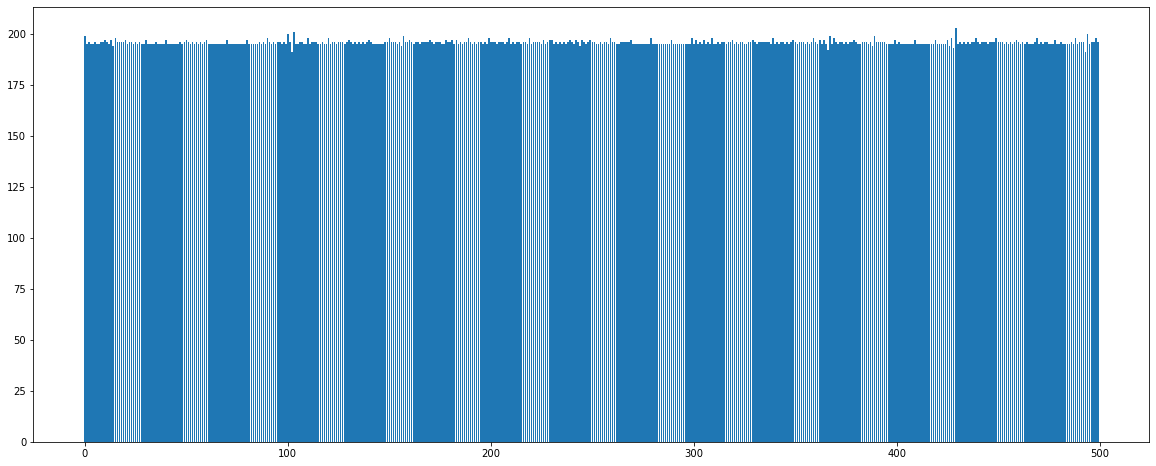

In [22]:
cnt_vis = cnt[:500]
plt.figure(figsize=(20, 8))
plt.bar(range(len(cnt_vis)), cnt_vis)

During 1 sec, the number of messages stables around 1953. 

### 2. The difference time between 2 messages? 

In [47]:
df['Time Diff'] = df['Timestamp'].diff(1) * 1000

In [48]:
df['Time Diff'].describe()

count    192515.000000
mean          0.478519
std           0.602313
min           0.125885
25%           0.236034
50%           0.241995
75%           0.252008
max           4.513979
Name: Time Diff, dtype: float64

<AxesSubplot:ylabel='Density'>

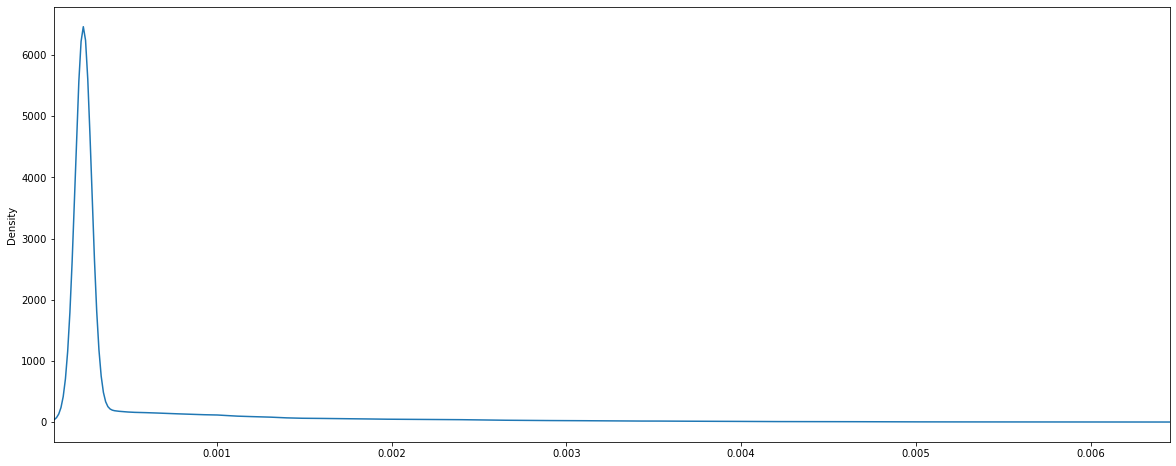

In [144]:
df['Time Diff'].plot.kde(xlim=(0.000066, 0.006452), figsize=(20, 8))

The difference between 2 consecutive messages is very small, around 0.5ms. 

There are few special case, which the time is around 6ms

### 3. For each ID: what difference between 2 messages, how many messages belongs to that ID? 

There are 27 unique ids

In [5]:
id_list = df[df['Label'] == 'Normal']['ID'].unique()
print('Number of ids: ', len(id_list))
print('Id list: ', sorted(id_list))

Number of ids:  45
Id list:  ['018', '034', '042', '043', '044', '050', '080', '081', '0A0', '0A1', '110', '120', '153', '164', '165', '18F', '1F1', '220', '260', '2A0', '2B0', '2C0', '316', '329', '350', '370', '382', '43F', '440', '4B0', '4B1', '4F0', '4F1', '4F2', '510', '517', '51A', '545', '587', '59B', '5A0', '5A2', '5E4', '5F0', '690']


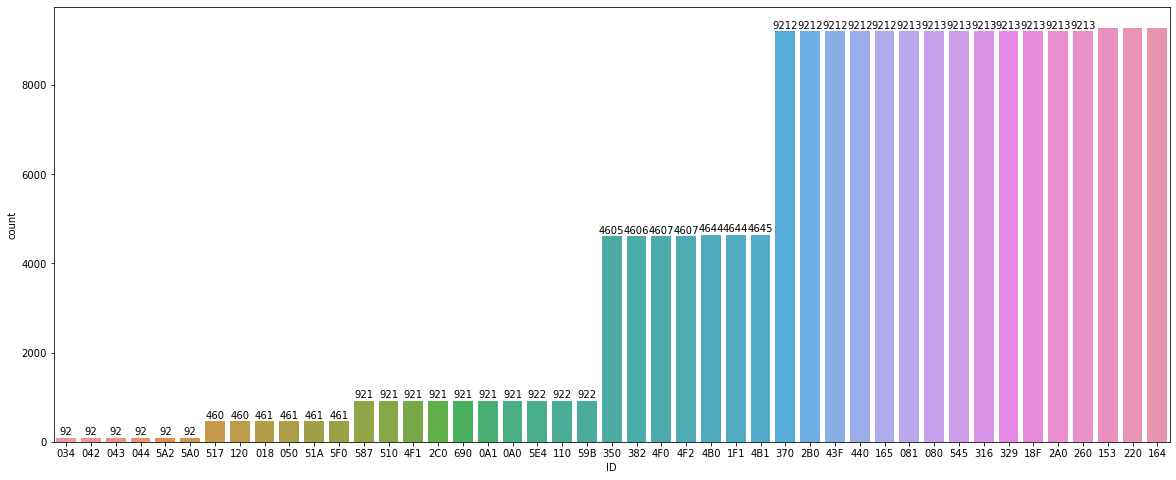

In [8]:
plt.figure(figsize=(20,8))
data = df[df['Label'] == 'Normal']
ax = sns.countplot(x="ID", data=df, order = data['ID'].value_counts().sort_index().sort_values().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='top', color='black', size=10)

In [189]:
chosen_id = '02c0'
df_by_id = df[df['ID'] == chosen_id].reset_index().drop('index', axis=1)
df_by_id['Time Diff'] = df_by_id['Timestamp'].diff()
df_by_id['Time'] = df_by_id['Timestamp'] - df_by_id['Timestamp'][0]
df_by_id

,Timestamp,ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Time Diff,Time
0,1.479121e+09,02c0,8,14,00,00,00,00,00,00,00,NaN,0.000000
1,1.479121e+09,02c0,8,14,00,00,00,00,00,00,00,0.009604,0.009604
2,1.479121e+09,02c0,8,14,00,00,00,00,00,00,00,0.009949,0.019553
3,1.479121e+09,02c0,8,14,00,00,00,00,00,00,00,0.010035,0.029588
4,1.479121e+09,02c0,8,14,00,00,00,00,00,00,00,0.009953,0.039541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50684,1.479122e+09,02c0,8,14,00,00,00,00,00,00,00,0.010558,506.391645
50685,1.479122e+09,02c0,8,14,00,00,00,00,00,00,00,0.009422,506.401067
50686,1.479122e+09,02c0,8,14,00,00,00,00,00,00,00,0.010579,506.411646
50687,1.479122e+09,02c0,8,14,00,00,00,00,00,00,00,0.009412,506.421058


In [190]:
desc = df_by_id['Time Diff'].describe()
desc

count    50688.000000
mean         0.009991
std          0.000316
min          0.007573
25%          0.009966
50%          0.009991
75%          0.010020
max          0.012366
Name: Time Diff, dtype: float64

<AxesSubplot:ylabel='Density'>

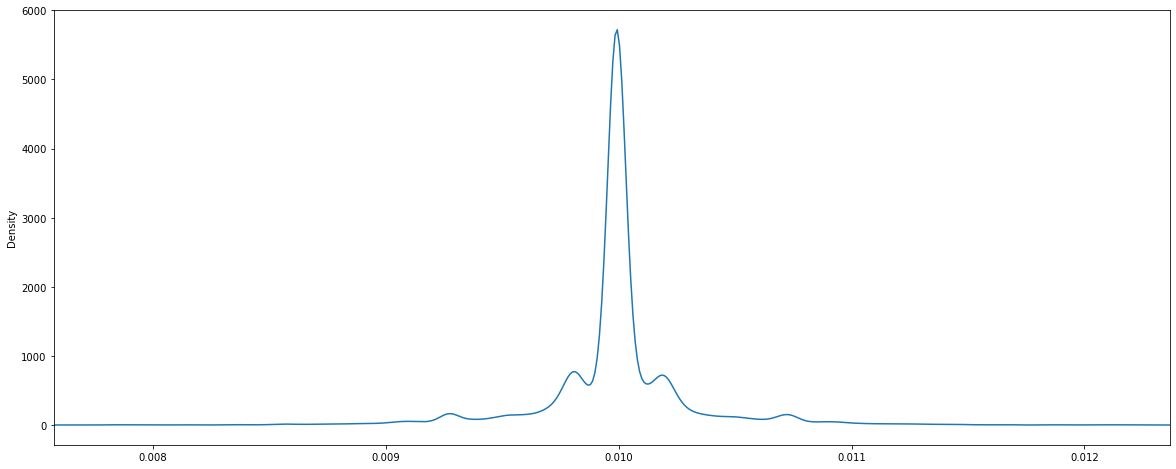

In [191]:
df_by_id['Time Diff'].plot.kde(xlim=(desc['min'], desc['max']), figsize=(20, 8))